In [2]:
import configparser
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import pandas as pd

from nltk.corpus import stopwords
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df['tweet_clean'] = df['tweets'].apply(cleanTxt)
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [4]:
# set files path
#csv1 = 'C:\\Users\\j1007736\\downloads\\tatachem_05032022.csv'
#csv2 = 'C:\\Users\\j1007736\\downloads\\tatachem2_05022022.csv'
#csv3 = 'C:\\Users\\j1007736\\downloads\\tatachem2_05022022.csv'
#csv4 = 'C:\\Users\\j1007736\\downloads\\tatachem_05022022.csv'
#print("*** Merging multiple csv files into a single pandas dataframe ***")
# merge files
#dataFrame1 = pd.concat(
#   map(pd.read_csv, [csv1,csv2,csv3,csv4]), ignore_index=True)
#dataFrame1 = df

df = pd.read_csv("C://Users/j1007736/downloads/20220503160223.csv")
df['time'] = pd.to_datetime(df['time']).dt.date
df.head()

,Unnamed: 0,tweets,likes,time,tweet_clean
0,0,@aswathiguna As per recommended I bought GMDC ...,0,2022-05-03,As per recommended I bought GMDC @ 193. TATA ...
1,1,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...
2,2,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...
3,3,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...
4,4,@TataCompanies Tata is great no doubt..but ple...,0,2022-05-03,Tata is great no doubt..but please do somethi...


In [5]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['tweet_clean'].apply(getSubjectivity)
df['Polarity'] = df['tweet_clean'].apply(getPolarity)
df

,Unnamed: 0,tweets,likes,time,tweet_clean,Subjectivity,Polarity
0,0,@aswathiguna As per recommended I bought GMDC ...,0,2022-05-03,As per recommended I bought GMDC @ 193. TATA ...,0.3000,-0.1000
1,1,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...,0.0000,0.0000
2,2,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...,0.0000,0.0000
3,3,RT @captwist_in: 82% - Maruti's market share i...,0,2022-05-03,_in: 82% - Maruti's market share in the CNG ca...,0.0000,0.0000
4,4,@TataCompanies Tata is great no doubt..but ple...,0,2022-05-03,Tata is great no doubt..but please do somethi...,0.9375,-0.5500
...,...,...,...,...,...,...,...
374,374,#tata motor future above♂️ 431 TGT 433-436-441...,0,2022-04-25,tata motor future above♂️ 431 TGT 433-436-441....,0.1250,0.0000
375,375,"@PMOIndia @narendramodi Namaskar Sir, \n I ...",0,2022-04-25,"Namaskar Sir, \n I am Ravi loni associat...",0.0000,0.0000
376,376,"@Dr_Uditraj @INCIndia When Tata Motor, Mahindr...",0,2022-04-25,"_Uditraj When Tata Motor, Mahindra, Jaguar &a...",0.5625,0.4375
377,377,"@Dr_Uditraj @INCIndia When Tata Motor,Mahindra...",0,2022-04-25,"_Uditraj When Tata Motor,Mahindra, Jaguar all...",0.5625,0.4375


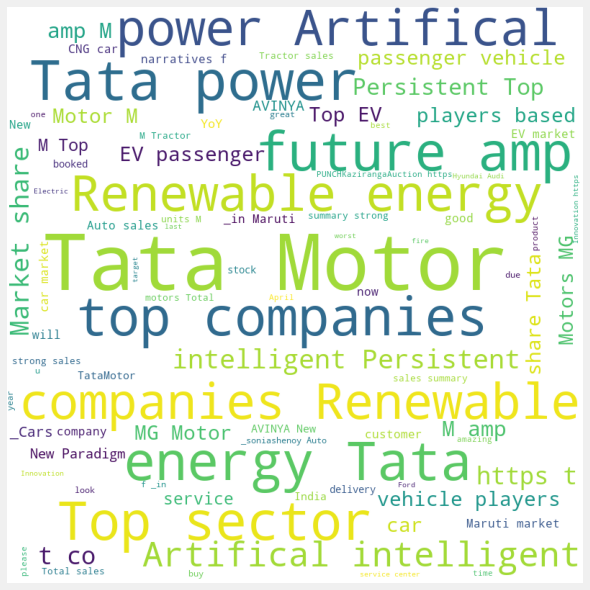

In [6]:
# Plot Word Cloud
from wordcloud import WordCloud
allWords = ' '.join([twts for twts in df['tweet_clean']])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(allWords)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [7]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
round((ptweets.shape[0] / df.shape[0])*100,1)
#Get the  percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)
#Get the  percentage of negative tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)

72.0

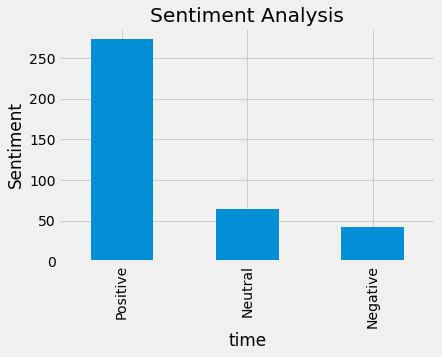

In [19]:
#Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xlabel('time')
plt.ylabel('Sentiment')
df['Analysis'].value_counts().plot(kind='bar')

#df.plot(x="time", y="Subjectivity", kind="line", figsize=(9, 8))
plt.show()

In [16]:
df.time.unique()

array([datetime.date(2022, 5, 3), datetime.date(2022, 5, 2),
       datetime.date(2022, 5, 1), datetime.date(2022, 4, 30),
       datetime.date(2022, 4, 29), datetime.date(2022, 4, 28),
       datetime.date(2022, 4, 27), datetime.date(2022, 4, 26),
       datetime.date(2022, 4, 25)], dtype=object)

In [22]:
#Show the value counts
df['Analysis'].value_counts()
# adding Label to the x-axis
plt.xlabel('time')
  
# adding legend to the curve
plt.ylabel('Sentiment')
df['Analysis'].value_counts(df['time]="2022-05-02"].plot(kind='bar')

SyntaxError: invalid syntax (Temp/ipykernel_14740/2442647688.py, line 8)